In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
Data= pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/wine.csv")

In [3]:
Data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5


In [18]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  Alcohol_content       1599 non-null   float64
 12  quality               1599 non-null   int64  
 13  Alcohol Content       1599 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 175.0 KB


In [6]:
Data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

In [7]:
Data.shape

(1599, 13)

In [8]:
Data["Alcohol_content"].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [10]:
from sklearn.preprocessing import OrdinalEncoder

In [14]:
OE= OrdinalEncoder()

In [15]:
Encode= OE.fit_transform(Data[["Alcohol_content"]])
Encode

array([[1.],
       [2.],
       [2.],
       ...,
       [0.],
       [2.],
       [0.]])

In [16]:
Data["Alcohol_content"]=Encode


In [17]:
Data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality,Alcohol Content
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1.0,5,1.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2.0,5,2.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2.0,5,2.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,2.0,6,2.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1.0,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2.0,5,2.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0.0,6,0.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0.0,6,0.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2.0,5,2.0


In [5]:
Data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


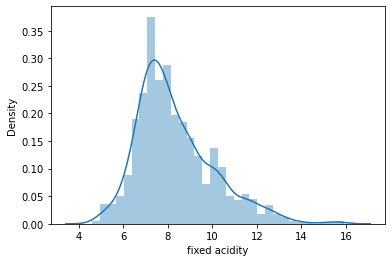

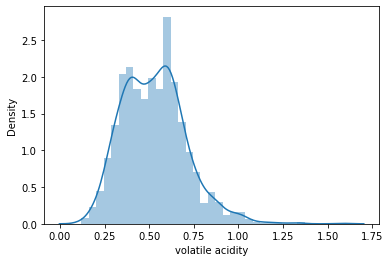

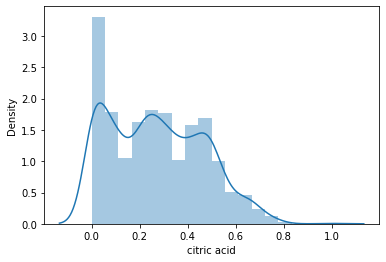

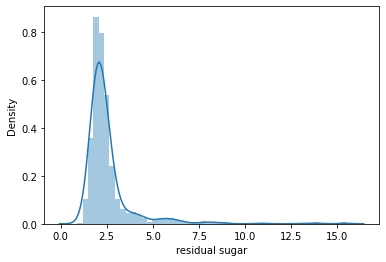

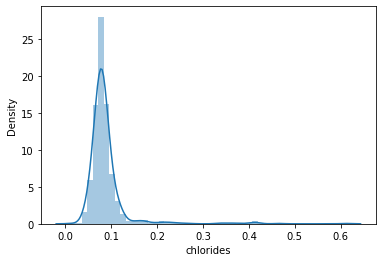

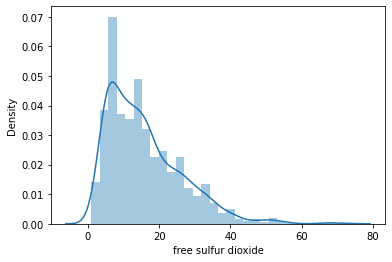

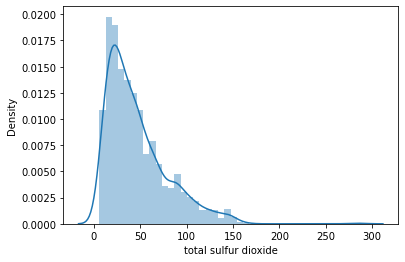

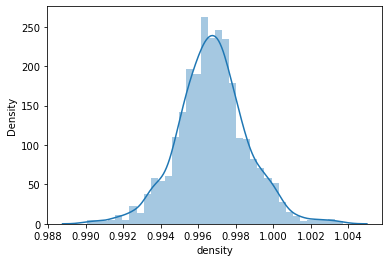

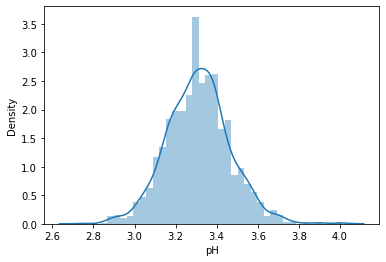

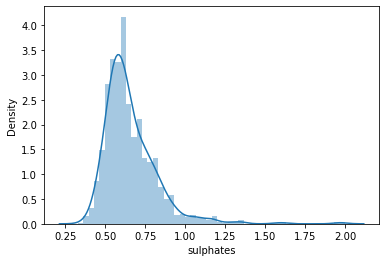

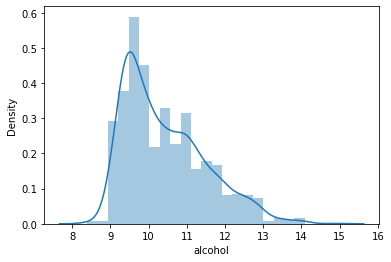

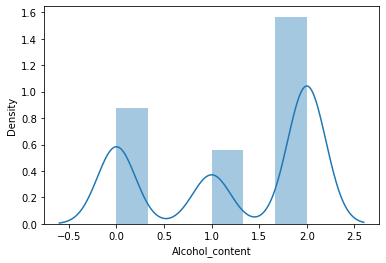

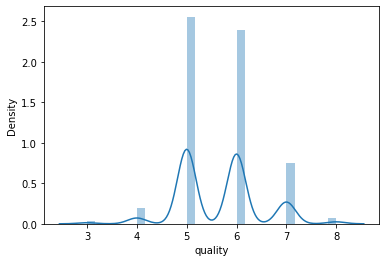

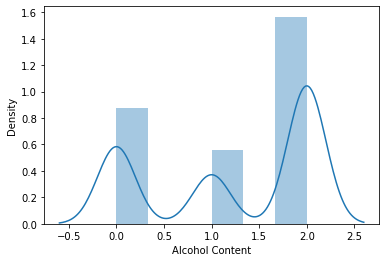

In [44]:
plotnumber=1
for column in Data:
 if plotnumber<=14:
    sns.distplot(Data[column])
    plt.xlabel(column)
 plotnumber=plotnumber+1
 plt.show()

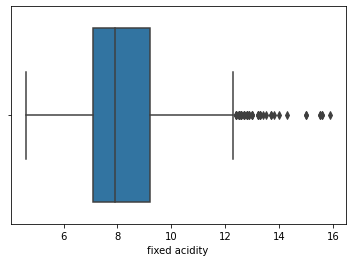

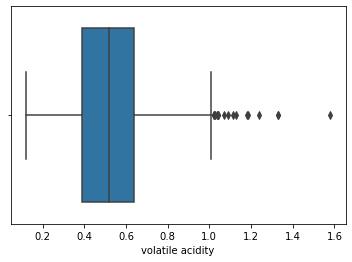

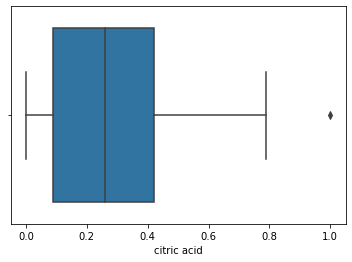

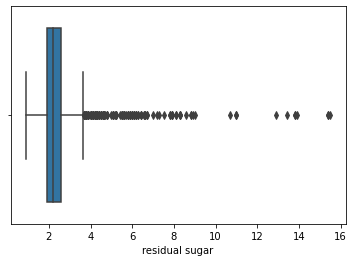

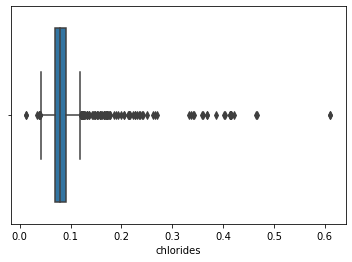

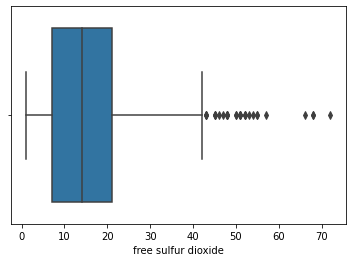

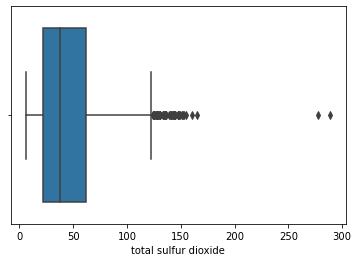

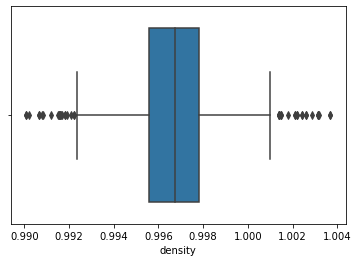

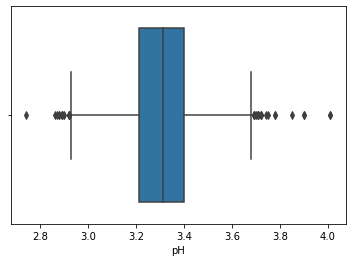

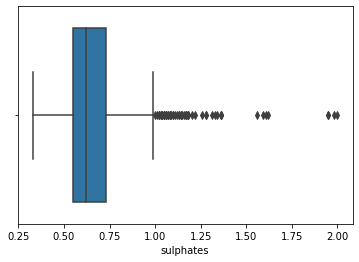

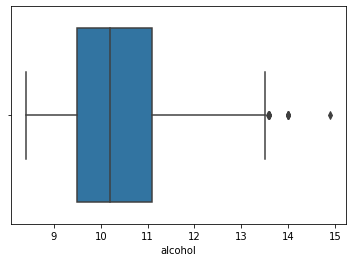

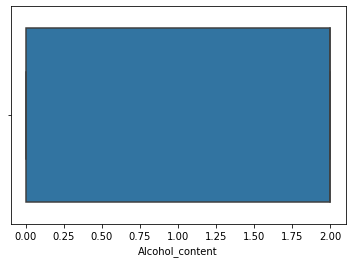

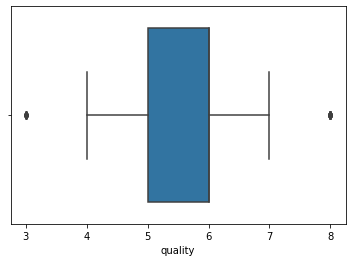

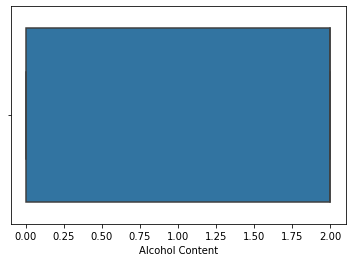

In [46]:
plotnumber=1
for column in Data:
 if plotnumber<=14:
    sns.boxplot(Data[column],orient='h')
    plt.xlabel(column)
 plotnumber=plotnumber+1
 plt.show()

# TECHNIQUE 1

In [60]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(Data))
print(z)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.528360          0.961877     1.391472        0.453218   0.243707   
1          0.298547          1.967442     1.391472        0.043416   0.223875   
2          0.298547          1.297065     1.186070        0.169427   0.096353   
3          1.654856          1.384443     1.484154        0.453218   0.264960   
4          0.528360          0.961877     1.391472        0.453218   0.243707   
...             ...               ...          ...             ...        ...   
1594       1.217796          0.403229     0.980669        0.382271   0.053845   
1595       1.390155          0.123905     0.877968        0.240375   0.541259   
1596       1.160343          0.099554     0.723916        0.169427   0.243707   
1597       1.390155          0.654620     0.775267        0.382271   0.264960   
1598       1.332702          1.216849     1.021999        0.752894   0.434990   

      free sulfur dioxide  

In [61]:
threshold = 3
print(np.where(z > 3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [63]:
q1= Data.quantile(0.25)
q1

fixed acidity            7.1000
volatile acidity         0.3900
citric acid              0.0900
residual sugar           1.9000
chlorides                0.0700
free sulfur dioxide      7.0000
total sulfur dioxide    22.0000
density                  0.9956
pH                       3.2100
sulphates                0.5500
alcohol                  9.5000
Alcohol_content          0.0000
quality                  5.0000
Alcohol Content          0.0000
Name: 0.25, dtype: float64

In [64]:
q3= Data.quantile(0.75)
q3

fixed acidity            9.200000
volatile acidity         0.640000
citric acid              0.420000
residual sugar           2.600000
chlorides                0.090000
free sulfur dioxide     21.000000
total sulfur dioxide    62.000000
density                  0.997835
pH                       3.400000
sulphates                0.730000
alcohol                 11.100000
Alcohol_content          2.000000
quality                  6.000000
Alcohol Content          2.000000
Name: 0.75, dtype: float64

In [65]:
iqr=q3-q1
iqr

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
Alcohol_content          2.000000
quality                  1.000000
Alcohol Content          2.000000
dtype: float64

In [68]:
Upper_Limit= q3 + 1.5 * iqr
Lower_Limit= q1 - 1.5 * iqr
Upper_Limit


fixed acidity            12.350000
volatile acidity          1.015000
citric acid               0.915000
residual sugar            3.650000
chlorides                 0.120000
free sulfur dioxide      42.000000
total sulfur dioxide    122.000000
density                   1.001187
pH                        3.685000
sulphates                 1.000000
alcohol                  13.500000
Alcohol_content           5.000000
quality                   7.500000
Alcohol Content           5.000000
dtype: float64

In [69]:
Lower_Limit

fixed acidity            3.950000
volatile acidity         0.015000
citric acid             -0.405000
residual sugar           0.850000
chlorides                0.040000
free sulfur dioxide    -14.000000
total sulfur dioxide   -38.000000
density                  0.992248
pH                       2.925000
sulphates                0.280000
alcohol                  7.100000
Alcohol_content         -3.000000
quality                  3.500000
Alcohol Content         -3.000000
dtype: float64

In [79]:
Index1=np.where(Data>Upper_Limit)
Index1

(array([   9,   11,   13,   14,   14,   14,   14,   15,   15,   15,   15,
          17,   17,   18,   19,   19,   33,   35,   38,   38,   39,   40,
          42,   43,   45,   55,   57,   57,   64,   65,   79,   81,   81,
          83,   83,   86,   86,   88,   88,   90,   91,   91,   92,   92,
          94,   94,   95,  106,  106,  109,  109,  120,  120,  125,  126,
         127,  130,  134,  142,  144,  145,  147,  151,  151,  151,  154,
         154,  155,  155,  156,  156,  157,  157,  161,  163,  164,  169,
         169,  181,  181,  188,  189,  190,  192,  192,  199,  201,  201,
         205,  206,  215,  219,  226,  226,  240,  240,  243,  244,  258,
         258,  264,  267,  268,  269,  270,  271,  272,  274,  275,  276,
         277,  278,  278,  279,  281,  281,  283,  291,  294,  294,  303,
         307,  308,  313,  324,  324,  325,  325,  326,  327,  328,  330,
         331,  335,  338,  338,  339,  339,  340,  347,  353,  353,  353,
         353,  354,  359,  363,  364, 

In [74]:
Index2=np.where(Data<Lower_Limit)
Index2

(array([ 142,  144,  151,  210,  354,  440,  459,  517,  544,  554,  555,
         557,  588,  591,  614,  650,  656,  657,  688,  690,  695,  695,
         797,  821,  832,  836,  836,  837,  837,  861,  899,  999, 1017,
        1017, 1018, 1018, 1114, 1122, 1126, 1228, 1269, 1270, 1298, 1299,
        1319, 1374, 1469, 1470, 1475, 1477, 1478, 1490, 1505, 1571],
       dtype=int64),
 array([ 7,  7,  8,  4,  7,  8, 12, 12,  8,  8,  8,  8,  7,  7,  8,  8,  8,
         8,  4, 12,  4,  7,  4,  7, 12,  4,  7,  4,  7,  4, 12,  7,  7,  8,
         7,  8,  7,  7,  7,  7,  7,  7,  7, 12,  8, 12, 12,  8,  7,  7, 12,
         4, 12,  4], dtype=int64))

In [80]:
Data=Data.drop(Data.index[Index1])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

# TECHNIQUE 2

In [81]:
q1= Data.quantile(0.25)
q3= Data.quantile(0.75)
IQR=q3-q1

In [83]:
High_Fixed_Acidity=(q3+(1.5*IQR.fixed acidity))
High_Fixed_Acidity

SyntaxError: invalid syntax (Temp/ipykernel_1368/3532269012.py, line 1)